In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("dataset/new_insurance_data.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
df.shape

(1338, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
df.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [8]:
df.isna().sum().sum()

52

In [9]:
len(df)*0.10

133.8

In [10]:
for ifc in df.select_dtypes(include="float64").columns:
    if(df[ifc].skew()>0.5):
        print(ifc, " skewed")
        df[ifc]=df[ifc].fillna(df[ifc].median())
    else:
        print(ifc, "normal")
        df[ifc]=df[ifc].fillna(df[ifc].mean())

age normal
bmi normal
children  skewed
Claim_Amount normal
past_consultations normal
num_of_steps normal
Hospital_expenditure  skewed
NUmber_of_past_hospitalizations normal
Anual_Salary  skewed
charges  skewed


In [11]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [12]:
df.isna().sum().sum()

0

age


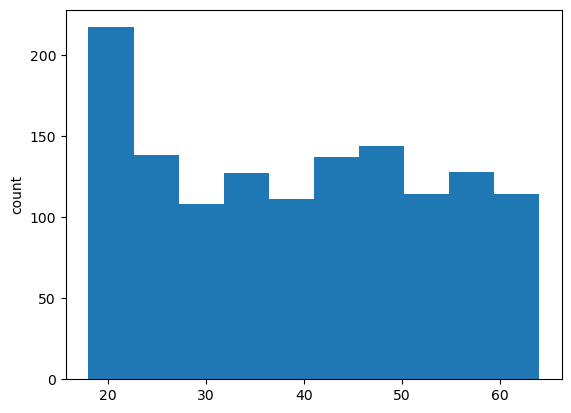

bmi


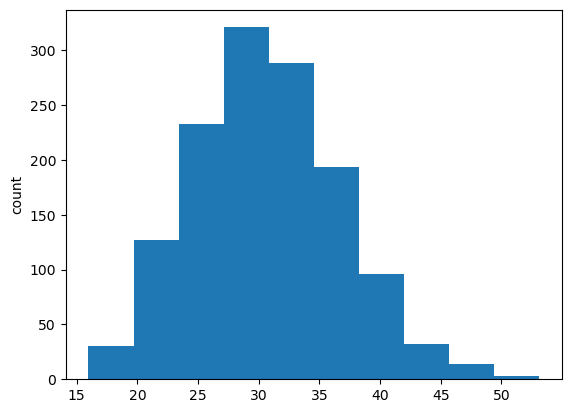

children


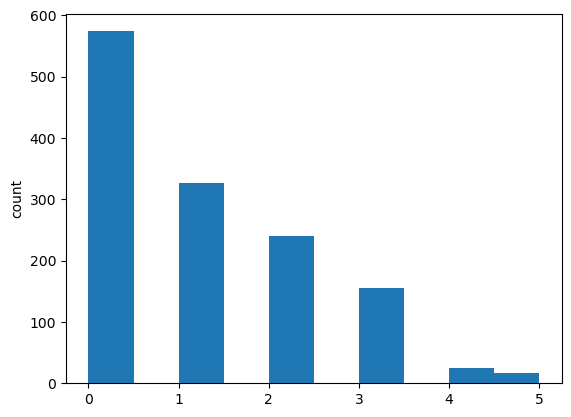

Claim_Amount


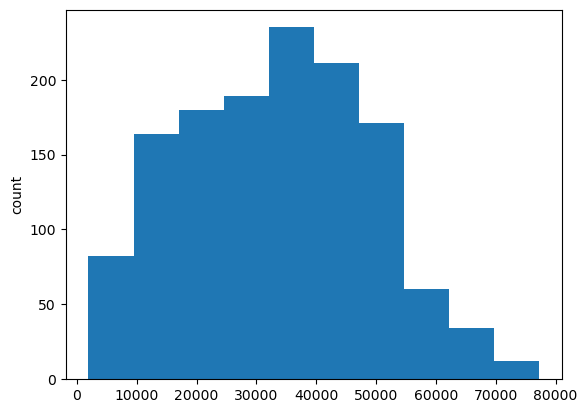

past_consultations


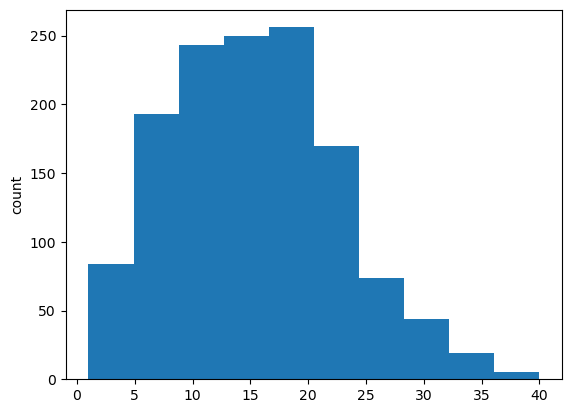

num_of_steps


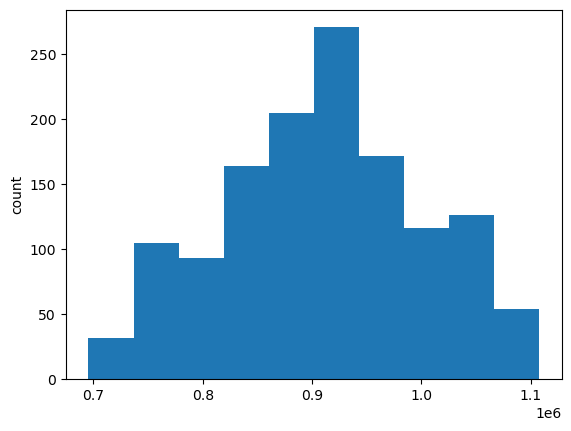

Hospital_expenditure


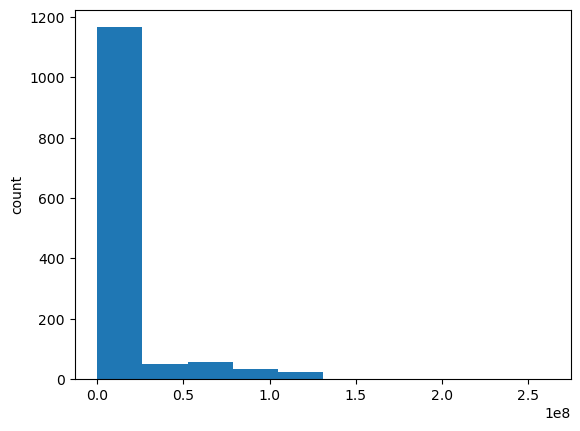

NUmber_of_past_hospitalizations


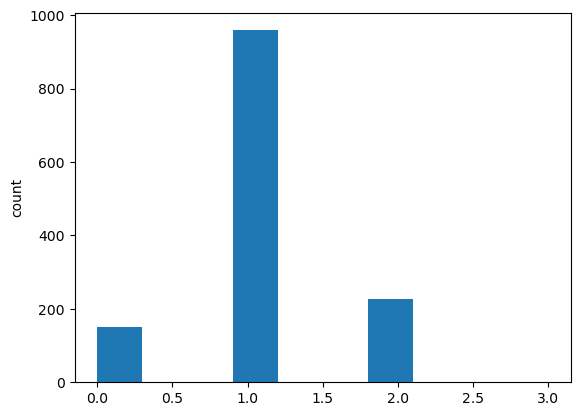

Anual_Salary


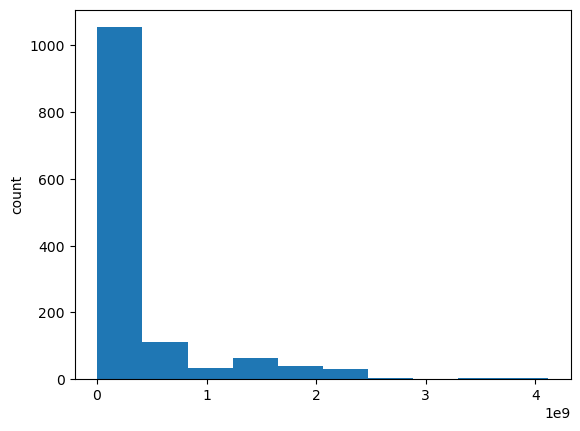

charges


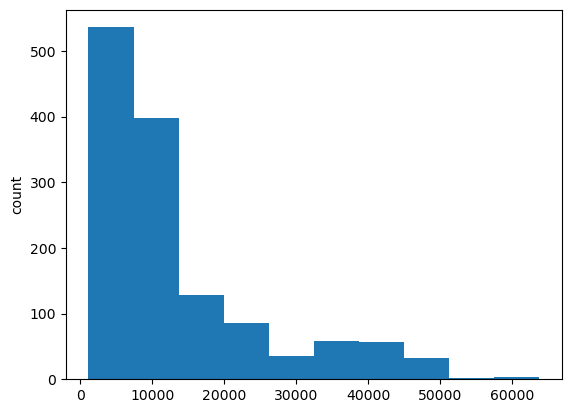

In [13]:
for i in df.select_dtypes(include='float64').columns:
    plt.hist(df[i])
    print(i)
    plt.ylabel("count")
    plt.show()

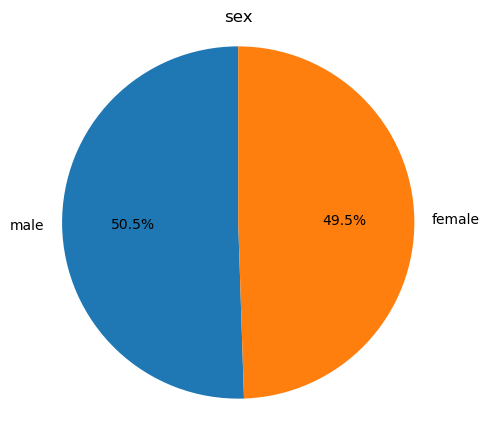

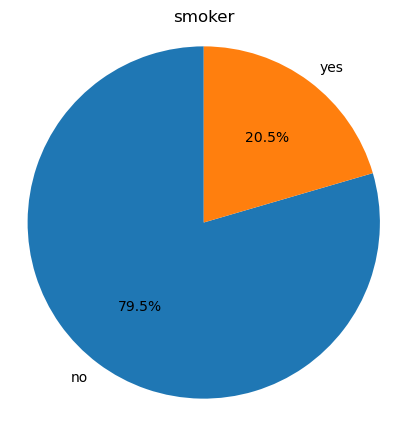

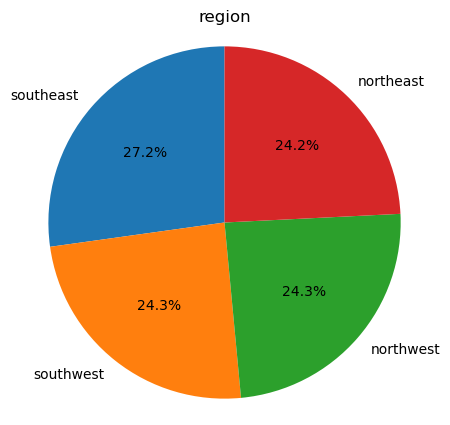

In [14]:
for i in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,5))
    cnt=df[i].value_counts()
    plt.title(i)
    plt.pie(cnt,labels=cnt.index,autopct='%1.1f%%',startangle=90)
    plt.axis('equal')
    plt.show()

<Axes: >

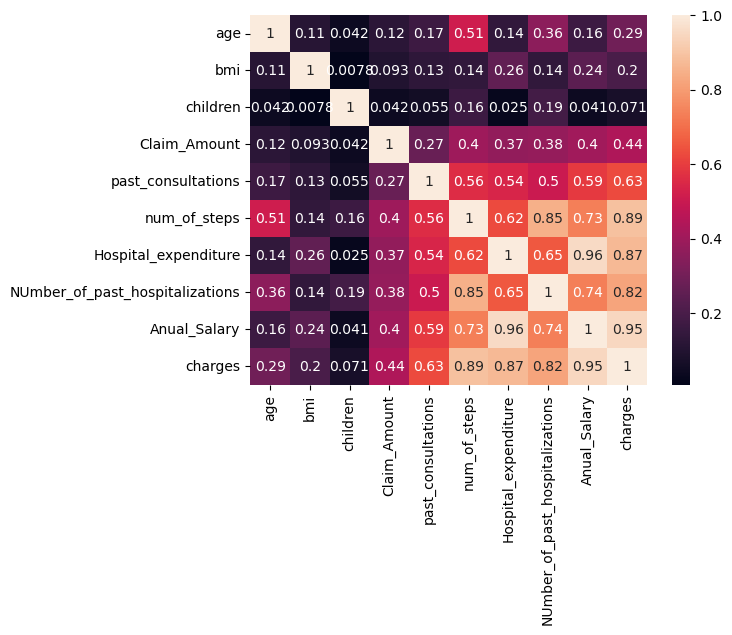

In [15]:
df_num=df.select_dtypes(include='float64')
sns.heatmap(df_num.corr(),annot=True)

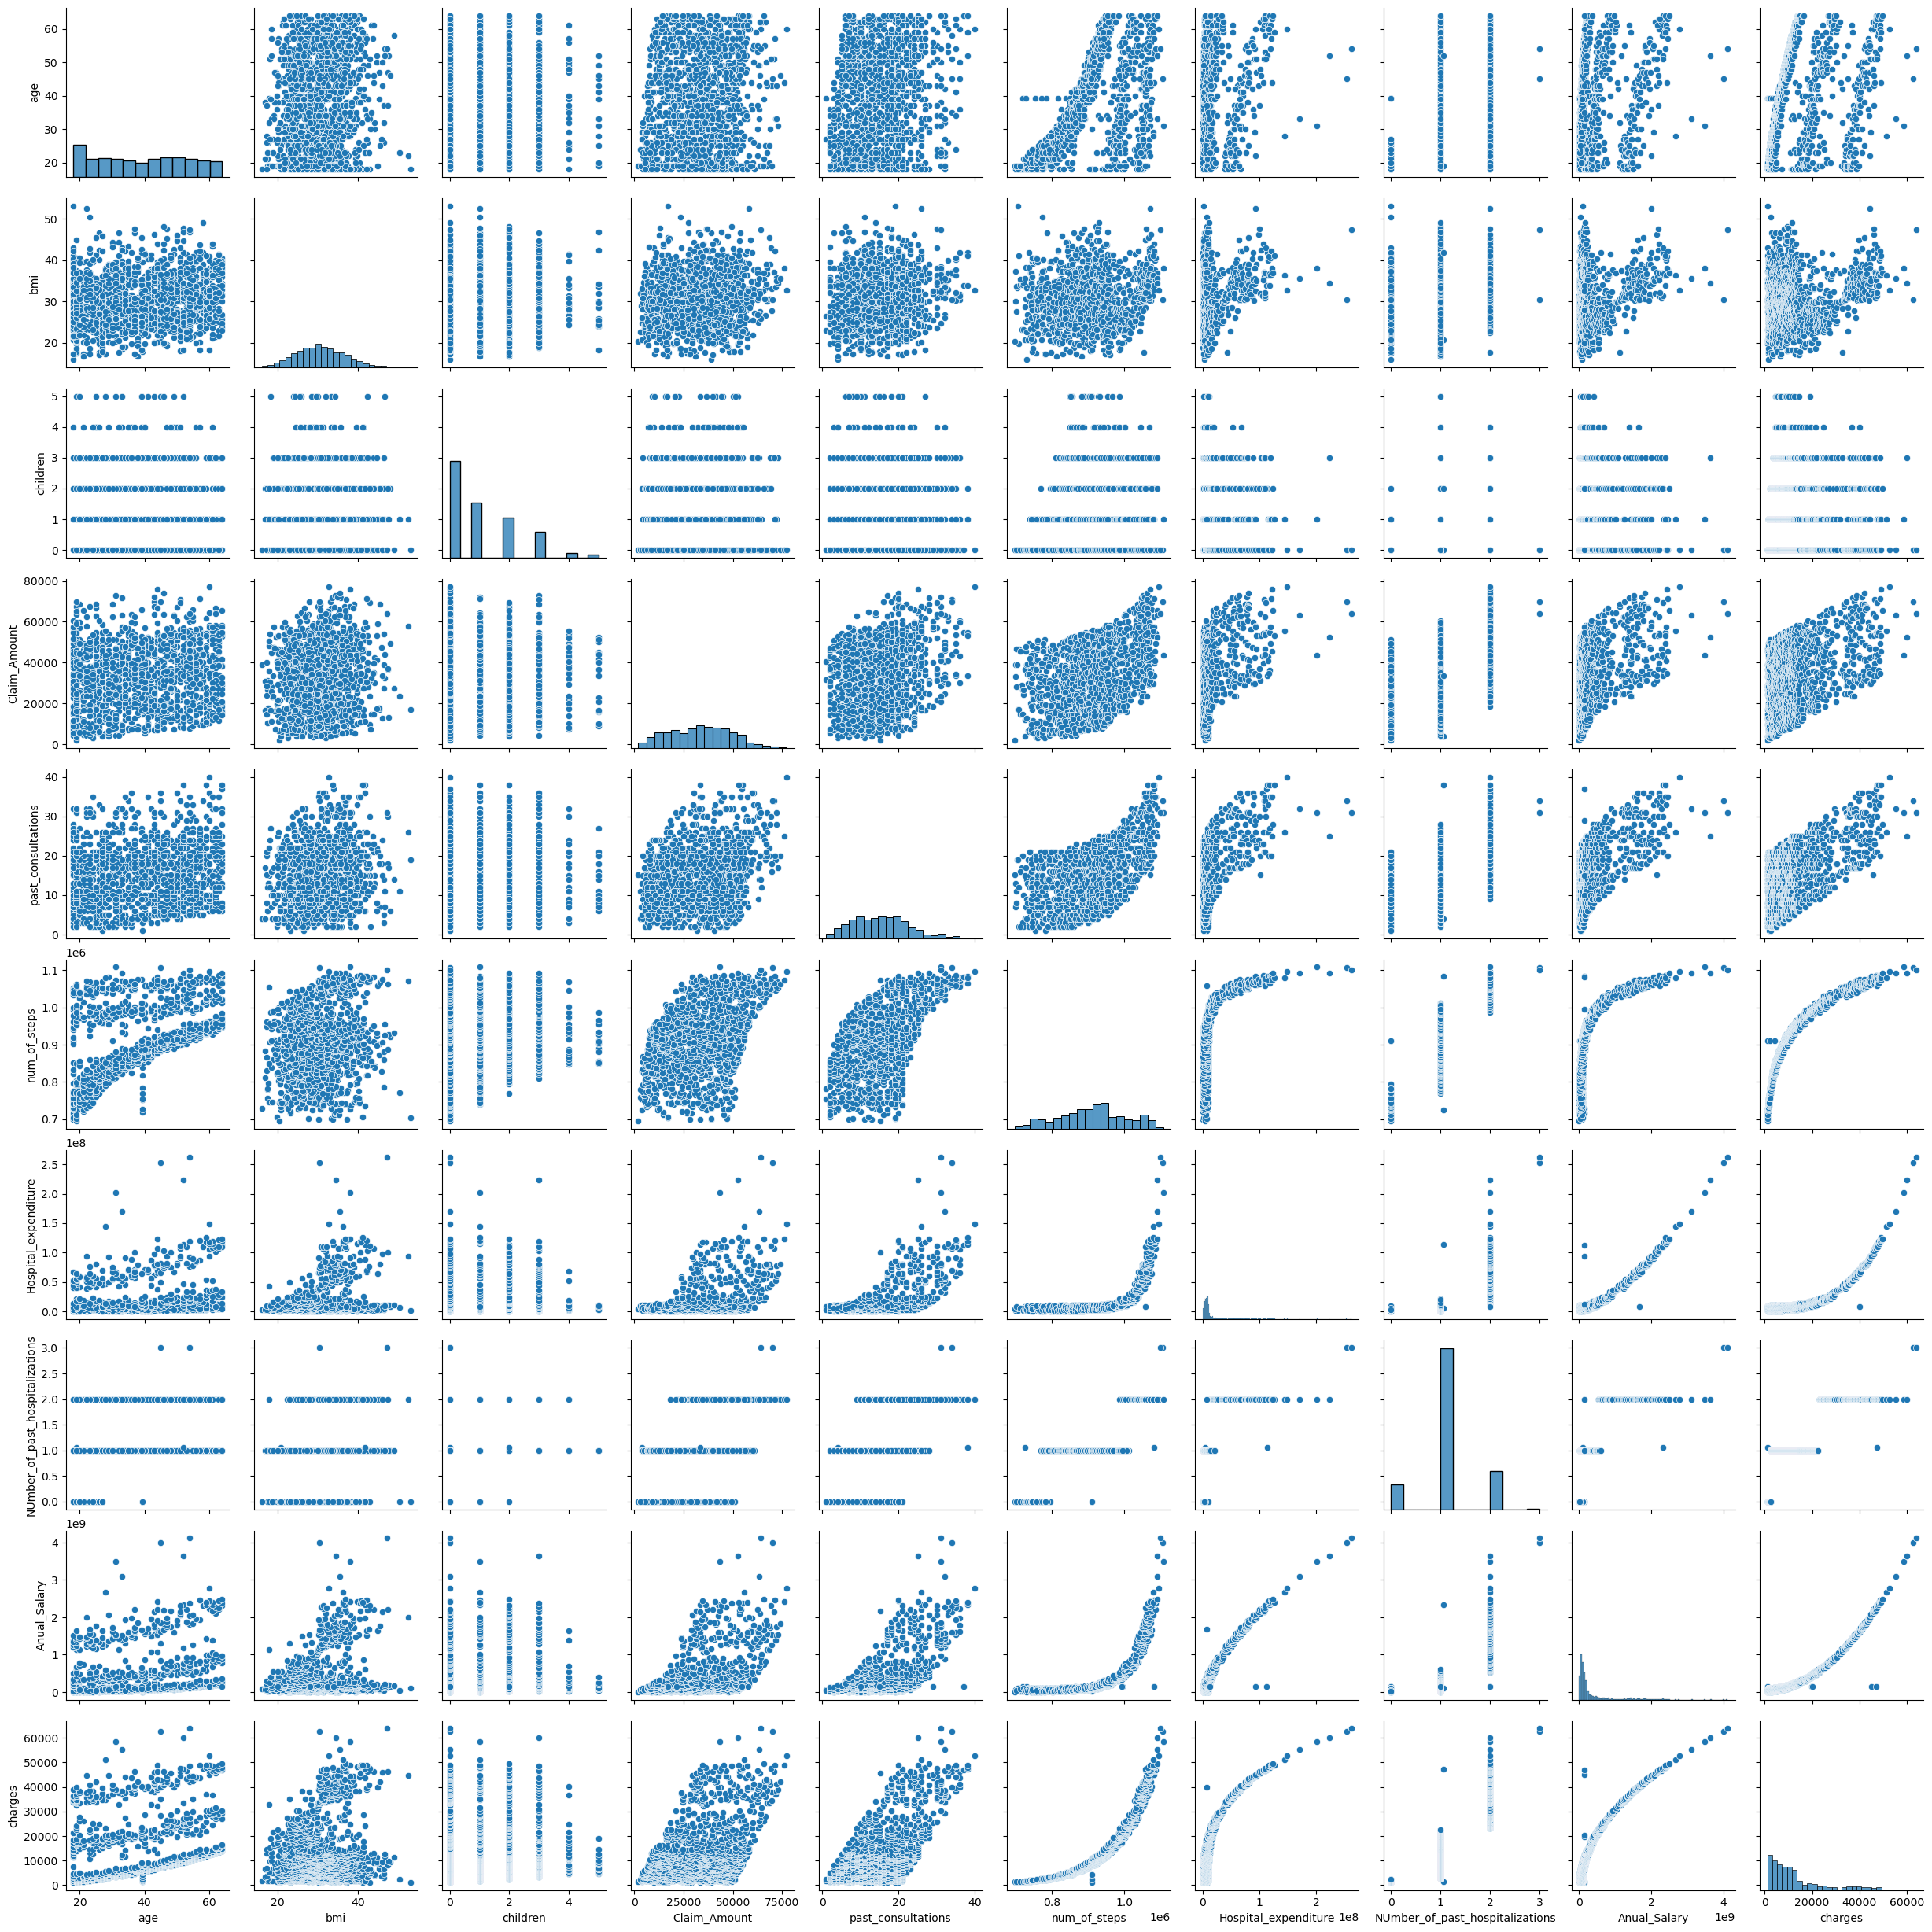

In [16]:
sns.pairplot(df)

In [17]:
y=df.iloc[:,-1]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1338, dtype: float64

age


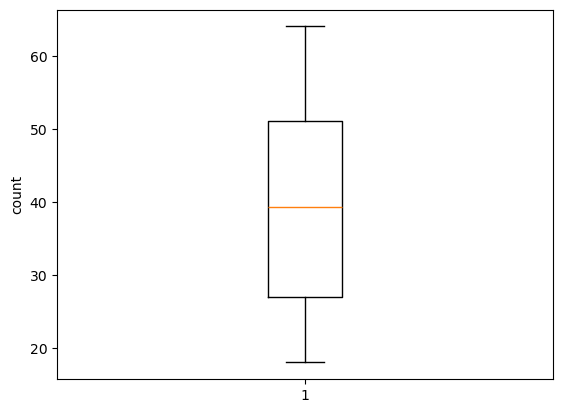

bmi


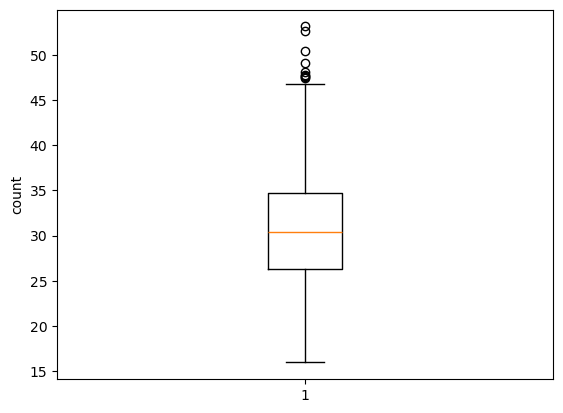

children


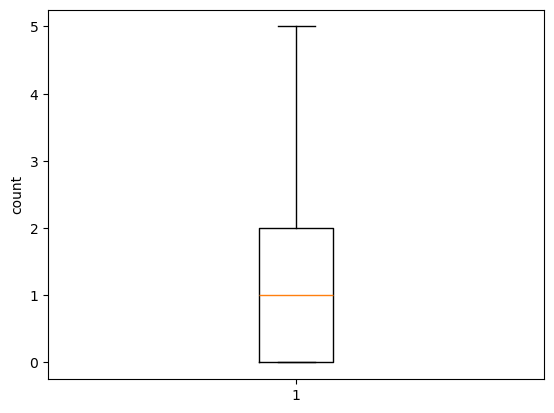

Claim_Amount


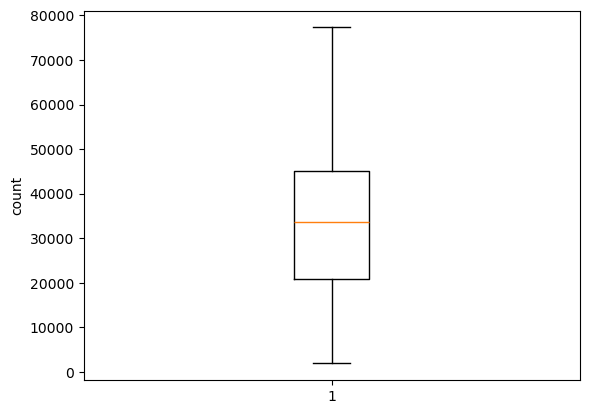

past_consultations


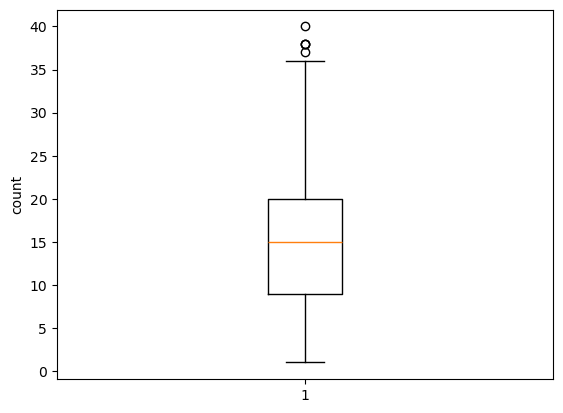

num_of_steps


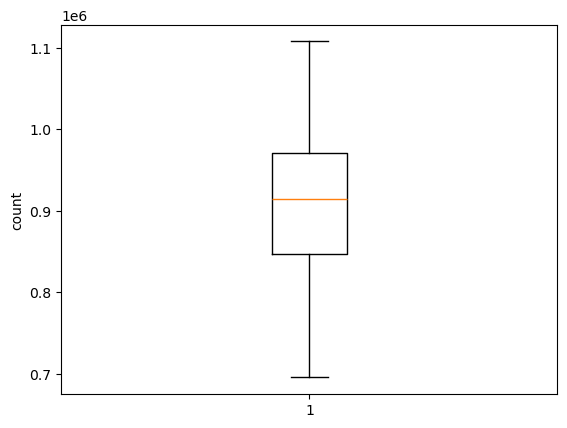

Hospital_expenditure


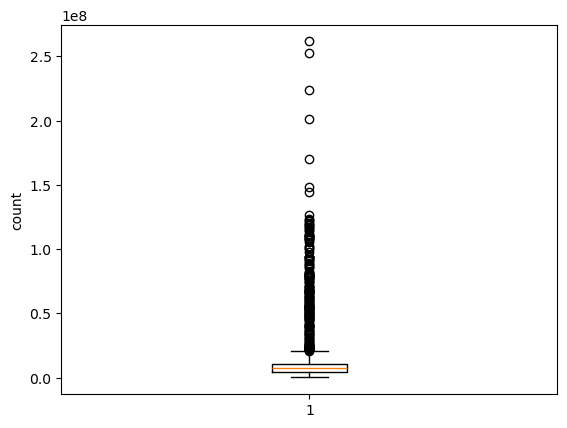

NUmber_of_past_hospitalizations


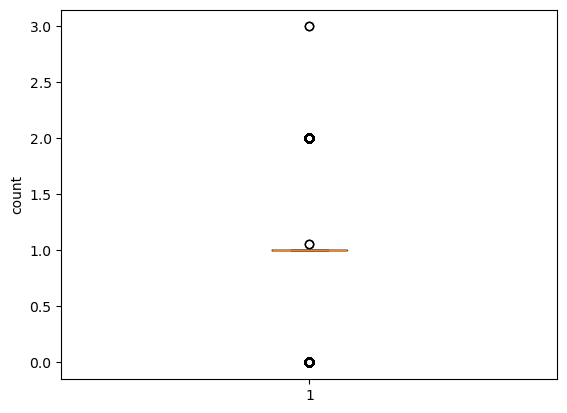

Anual_Salary


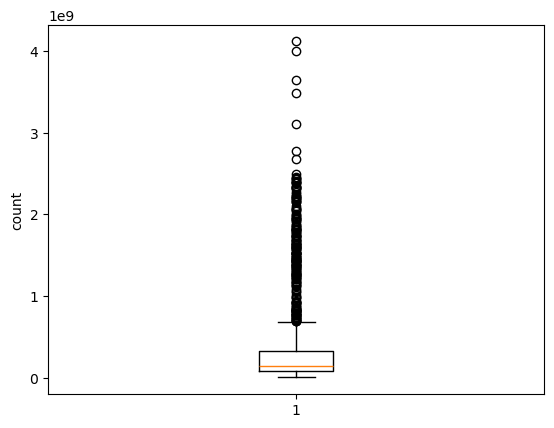

charges


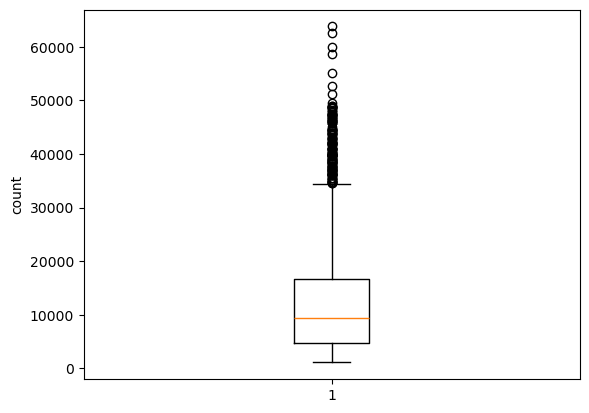

In [18]:
for i in df.select_dtypes(include='float64').columns:
    plt.boxplot(df[i])
    print(i)
    plt.ylabel("count")
    plt.show()

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')


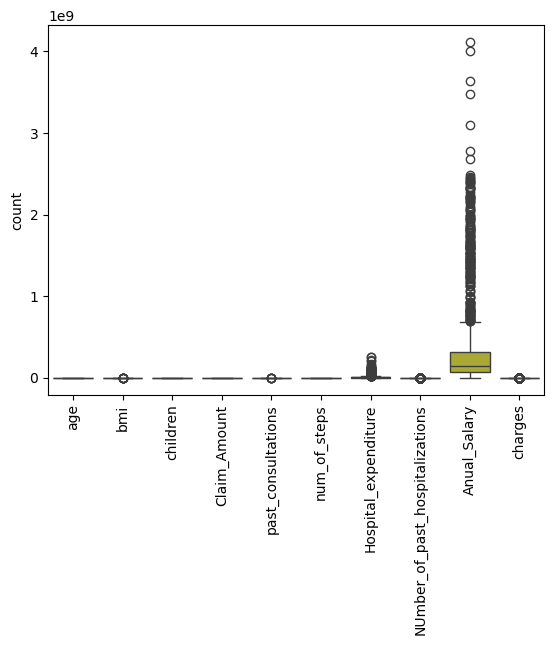

In [19]:
ddd=df.select_dtypes(include=['float64']).columns
print(ddd)
sns.boxplot(df[ddd])
plt.xticks(rotation='vertical')
plt.ylabel('count')
plt.show()

In [20]:
outlier_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for i in outlier_list:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]>Q1-1.5*IQR) & (df[i]< Q3+1.5*IQR)]

In [21]:
df.shape

(1030, 13)

In [22]:
df.duplicated().sum()

0

In [23]:
df=df.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [24]:
df=df.drop(['bmi'],axis=1)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,13.792519
1,children,1.833335
2,Claim_Amount,5.683286
3,past_consultations,6.249487
4,num_of_steps,26.121303
5,Hospital_expenditure,5.320052
6,Anual_Salary,5.325988


In [26]:
df=df.drop(['num_of_steps'],axis=1)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,8.489672
1,children,1.736466
2,Claim_Amount,4.666169
3,past_consultations,5.213493
4,Hospital_expenditure,4.581859
5,Anual_Salary,5.309970


In [28]:
df=df.drop(['age'],axis=1)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,children,1.714400
1,Claim_Amount,4.169418
2,past_consultations,4.671708
3,Hospital_expenditure,4.391913
4,Anual_Salary,4.398658


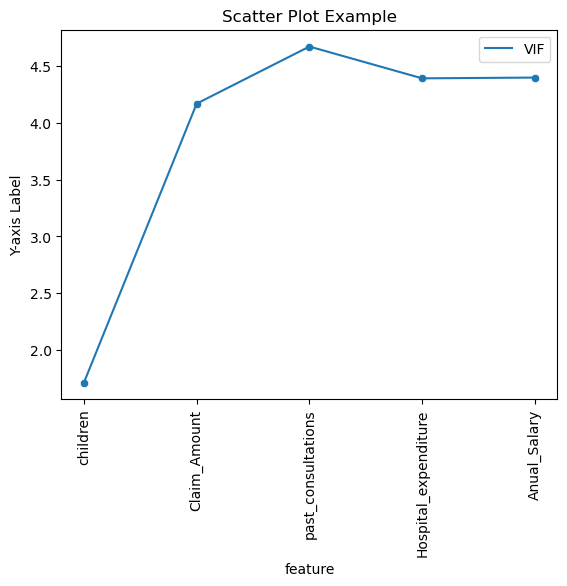

In [30]:
sns.scatterplot(data=vif_data,x='feature', y='VIF')
sns.lineplot(data=vif_data)
plt.xticks(rotation=90)
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,1.419361e+08


In [33]:
y=df.iloc[:,-1]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [34]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,1.419361e+08


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80, random_state=999)
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
378,2.0,46073.654360,5.0,2.606962e+06,4.707590e+07
730,0.0,55821.532460,17.0,5.048570e+06,1.725900e+08
66,0.0,17975.327670,14.0,4.993491e+05,5.445941e+07
391,0.0,31971.078820,16.0,9.642962e+06,4.098743e+07
845,3.0,52155.958830,11.0,7.683186e+06,1.969077e+08
...,...,...,...,...,...
477,2.0,30943.342060,17.0,2.941387e+06,6.400286e+07
227,1.0,16091.000090,11.0,3.454417e+06,7.257541e+07
483,2.0,18512.993280,16.0,7.442466e+05,1.368503e+08
875,0.0,41844.564980,8.0,1.191697e+07,1.629471e+08


In [36]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
688,0.0,55041.11308,16.0,9347759.462,1.776668e+08
118,0.0,41088.03452,5.0,9130424.338,8.280646e+07
162,0.0,40556.76177,4.0,8480882.157,9.511170e+07
319,4.0,49387.26568,21.0,6722423.975,3.013997e+07
95,0.0,46294.14244,12.0,8618011.074,4.945314e+07
...,...,...,...,...,...
710,1.0,16041.60718,11.0,2058404.704,1.081633e+08
303,2.0,50874.98966,11.0,1295881.058,3.472714e+07
292,2.0,15024.52722,3.0,9950954.420,1.925496e+07
384,2.0,29946.32144,15.0,4697699.977,5.466699e+07


In [37]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [38]:
predictions=l_model.predict(x_test)

In [39]:
predictions

array([10471.25366235,  5529.11641942,  6048.35213521,  4425.99288886,
        4118.86086489,  7154.72616597,  4648.07601625,  6222.23679043,
        3303.81369783,  7093.51748124,  4133.18968095,  5029.83661263,
        5313.11528514,  5704.04971903, 17078.46509785,  5435.55726454,
        8503.24039662,  8501.28232022,  9260.49724433, 12948.55988324,
        7294.69367535,  8150.12881152,  4813.81049389,  3519.73342868,
        9416.80750605,  3345.93031816,  4401.60930288,  4878.02158983,
        3989.87672786,  3486.0001241 ,  4990.38933128,  4165.68838325,
        7555.3540326 ,  2168.56642125, 14409.90355066, 13197.08202661,
       17589.27499621, 16807.77427263, 10032.6239167 ,  7025.39336093,
        4897.52432215,  5966.24684498,  5652.36614816,  6765.28035805,
        7459.87742649,  5040.1579555 ,  5285.67826968, 19306.18534823,
        5778.08364604, 13137.04266401,  2203.79314228,  7088.18046215,
        6247.74907679,  4175.13089161,  9734.88884564,  6023.34477825,
      

In [40]:
from sklearn.metrics import *
r2score=r2_score(y_test,predictions)
r2score

0.843458721802264

In [41]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
688,0.0,55041.11308,16.0,9347759.462,1.776668e+08
118,0.0,41088.03452,5.0,9130424.338,8.280646e+07
162,0.0,40556.76177,4.0,8480882.157,9.511170e+07
319,4.0,49387.26568,21.0,6722423.975,3.013997e+07
95,0.0,46294.14244,12.0,8618011.074,4.945314e+07
...,...,...,...,...,...
710,1.0,16041.60718,11.0,2058404.704,1.081633e+08
303,2.0,50874.98966,11.0,1295881.058,3.472714e+07
292,2.0,15024.52722,3.0,9950954.420,1.925496e+07
384,2.0,29946.32144,15.0,4697699.977,5.466699e+07


In [42]:
a=l_model.predict([[3,47488,18,378499,3883929]])
a

C:\Users\HP\anaconda\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2421.08567523])

In [43]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions)
print('Mean Squared Error:',mse)

Mean Squared Error: 3150553.8107674853


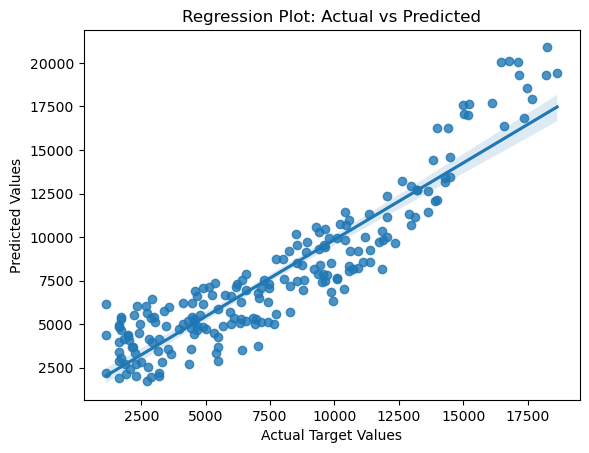

In [44]:
sns.regplot(x=y_test,y=predictions)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot: Actual vs Predicted')
plt.show()

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
gbm_reg=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3, random_state=42)
gbm_reg.fit(x_train,y_train.ravel())

C:\Users\HP\AppData\Local\Temp\ipykernel_3304\410168934.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  gbm_reg.fit(x_train,y_train.ravel())


GradientBoostingRegressor(random_state=42)

In [47]:
y_train_pred = gbm_reg.predict(x_train)
y_test_pred = gbm_reg.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print(f"Training R²: {r2_train:.2f}")
print(f"Testing R²: {r2_test:.2f}")
print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")

Training R²: 0.92
Testing R²: 0.88
Training MSE: 1583462.23
Testing MSE: 2316519.48
Training RMSE: 1258.36
Testing RMSE: 1522.01


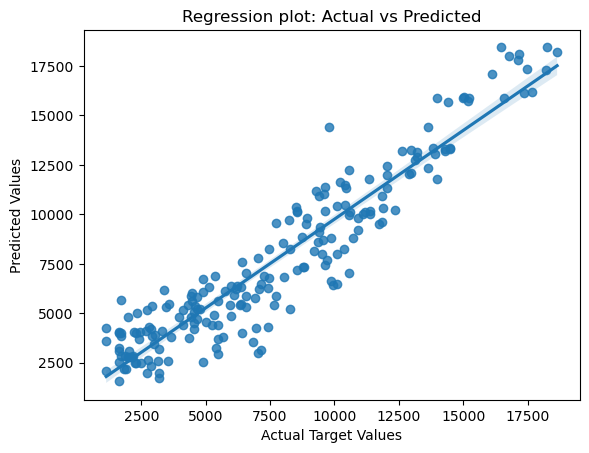

In [48]:
sns.regplot(x=y_test,y=y_test_pred)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Regression plot: Actual vs Predicted')
plt.show()

In [49]:
import pickle
with open("Insurance_Model.pkl","wb")as f:
    pickle.dump(gbm_reg,f)

In [50]:
with open("Insurance_Model.pkl","rb")as f:
    model=pickle.load(f)

In [51]:
model.predict([[4,48488, 28, 278499, 5883929]])

C:\Users\HP\anaconda\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([4775.69060537])